In [1]:
import scanpy as sc

In [2]:
ad = sc.read_h5ad('../data/Xenium_AD_mouse.h5ad')

/Users/christoffer/miniconda3/envs/sc/lib/python3.8/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [3]:
ad.obs

x_centroid   y_centroid  transcript_counts  control_probe_counts  \
cell_id                                                                         
aaabaohn-1   844.394379   870.383969                181                     0   
aaabocno-1   830.434280   771.295468                294                     0   
aaadpgin-1   851.595981   706.267719                155                     0   
aaaecjii-1   828.756277   852.021915                282                     0   
aaaegkaj-1   835.794717   637.692163                166                     0   
...                 ...          ...                ...                   ...   
oimogeoh-1  5087.284863  4448.706177                 43                     0   
oinaaffl-1  5068.694434  4474.151392                 98                     0   
oinbccdk-1  5074.575952  4437.239062                 71                     0   
oindmjog-1  5068.380664  4446.804883                 35                     0   
oinecaba-1  5072.841504  4459.385132                124                     0   

            control_codeword_counts  unassigned_codeword_counts  total_counts  \
cell_id                                                                         
aaabaohn-1                        0                           0         181.0   
aaabocno-1                        0                           0         294.0   
aaadpgin-1                        0                           0         155.0   
aaaecjii-1                        0                           0         282.0   
aaaegkaj-1                        0                           0         166.0   
...                             ...                         ...           ...   
oimogeoh-1                        0                           0          43.0   
oinaaffl-1                        0                           0          98.0   
oinbccdk-1                        1                           0          71.0   
oindmjog-1                        0                           0          35.0   
oinecaba-1                        0                           0         124.0   

             cell_area  nucleus_area                                      run  \
cell_id                                                                         
aaabaohn-1  279.020469     46.240000   Xenium_V1_FFPE_TgCRND8_5_7_months_outs   
aaabocno-1  565.401406     26.642187   Xenium_V1_FFPE_TgCRND8_5_7_months_outs   
aaadpgin-1  351.405937     18.694688   Xenium_V1_FFPE_TgCRND8_5_7_months_outs   
aaaecjii-1  528.553906     68.502031   Xenium_V1_FFPE_TgCRND8_5_7_months_outs   
aaaegkaj-1  109.820000     42.266250   Xenium_V1_FFPE_TgCRND8_5_7_months_outs   
...                ...           ...                                      ...   
oimogeoh-1  246.643438     10.702031  Xenium_V1_FFPE_TgCRND8_17_9_months_outs   
oinaaffl-1  612.409063     12.056719  Xenium_V1_FFPE_TgCRND8_17_9_months_outs   
oinbccdk-1  177.057656     13.501719  Xenium_V1_FFPE_TgCRND8_17_9_months_outs   
oindmjog-1  229.709844     15.985312  Xenium_V1_FFPE_TgCRND8_17_9_months_outs   
oinecaba-1  359.353438     18.423750  Xenium_V1_FFPE_TgCRND8_17_9_months_outs   

            ...  n_genes  leiden_0.5  leiden_1 leiden_1.5 leiden_2 leiden_2.5  \
cell_id     ...                                                                 
aaabaohn-1  ...       54           1         8          6       11         25   
aaabocno-1  ...       72           4         4          1        0         14   
aaadpgin-1  ...       48           1         8          6       11         16   
aaaecjii-1  ...       79           4         4          1        0         14   
aaaegkaj-1  ...       59           0         6          4        3         15   
...         ...      ...         ...       ...        ...      ...        ...   
oimogeoh-1  ...       22           5         2         24       23         27   
oinaaffl-1  ...       41           5         2         24       23         27   
oinbccdk-1  ...       37           5     

In [4]:
import warnings
warnings.filterwarnings('ignore')
import scanpy as sc
import matplotlib.pyplot as plt 
import numpy as np
def spatial_neigbourshoods(anndata,
                           cluster_label = 'leiden_0.5',
                           max_distance_allowed = 200):
    
    import numpy as np
    import scanpy as sc
    import pandas as pd
    from sklearn.metrics.pairwise import euclidean_distances
    
    distances_input=np.array([anndata.obs['x_centroid'],anndata.obs['y_centroid']])
    din=distances_input.transpose()
    distances=euclidean_distances(din, din)
    dist_df=pd.DataFrame(distances)
    max_distance_allowed=max_distance_allowed
    dist_binary=((dist_df<max_distance_allowed)*1)*((dist_df!=
                                                     0)*1)
    np.sum(np.sum(dist_binary))
    dist_binary['name']=list(anndata.obs[cluster_label])
    distbinsum=dist_binary.groupby('name').sum()
    adata=sc.AnnData(distbinsum.transpose())
    adata.obs=anndata.obs

    return adata


In [17]:
ad.obs.run.unique()

['Xenium_V1_FFPE_TgCRND8_5_7_months_outs', 'Xenium_V1_FFPE_wildtype_2_5_months_outs', 'Xenium_V1_FFPE_wildtype_13_4_months_outs', 'Xenium_V1_FFPE_wildtype_5_7_months_outs', 'Xenium_V1_FFPE_TgCRND8_2_5_months_outs', 'Xenium_V1_FFPE_TgCRND8_17_9_months_outs']
Categories (6, object): ['Xenium_V1_FFPE_TgCRND8_2_5_months_outs', 'Xenium_V1_FFPE_TgCRND8_5_7_months_outs', 'Xenium_V1_FFPE_TgCRND8_17_9_months_outs', 'Xenium_V1_FFPE_wildtype_2_5_months_outs', 'Xenium_V1_FFPE_wildtype_5_7_months_outs', 'Xenium_V1_FFPE_wildtype_13_4_months_outs']

In [18]:
ad_sub = ad[ad.obs.run == 'Xenium_V1_FFPE_TgCRND8_5_7_months_outs']

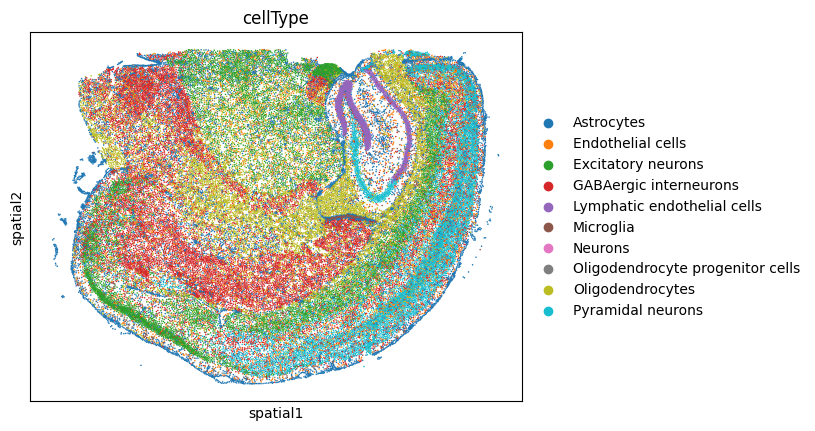

In [19]:
for i in ad_sub.obs['run'].unique():
    ad_sub_sample = ad_sub[ad_sub.obs['run'] == i]
    sc.pl.spatial(ad_sub_sample, color = 'cellType', spot_size = 20)

In [6]:
ad.obsm['spatial'].max()

6656.921508789063

In [41]:
ad_sn_list = []
for i in ad_sub.obs['run'].unique():
    print(i)
    ad_sub_sample = ad_sub[ad_sub.obs['run'] == i]
    ad_sn = spatial_neigbourshoods(anndata = ad_sub_sample, cluster_label = 'leiden_2',max_distance_allowed = 100) #50 #600 #200#550
    ad_sn_list.append(ad_sn)

Xenium_V1_FFPE_TgCRND8_5_7_months_outs


In [42]:
ad_sn = sc.concat(ad_sn_list, join = 'outer', fill_value = 0)

In [43]:
spatial = np.array(ad_sn.obs[['x_centroid','y_centroid']])
ad_sn.obsm['spatial'] = spatial

In [44]:
sc.pp.neighbors(ad_sn, n_neighbors=10)
sc.tl.umap(ad_sn,min_dist=0.2)

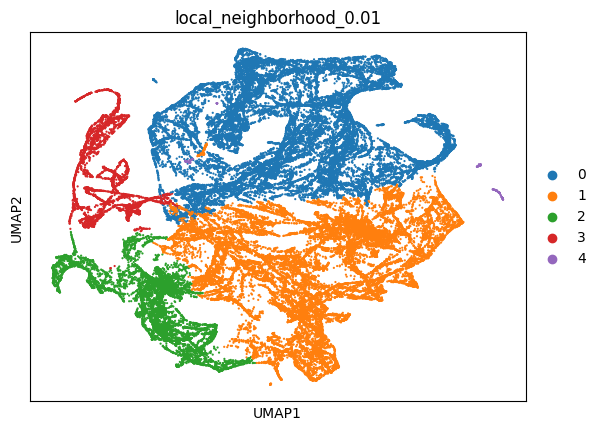

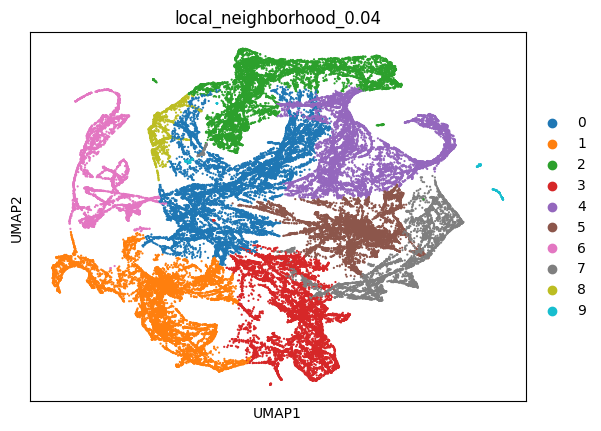

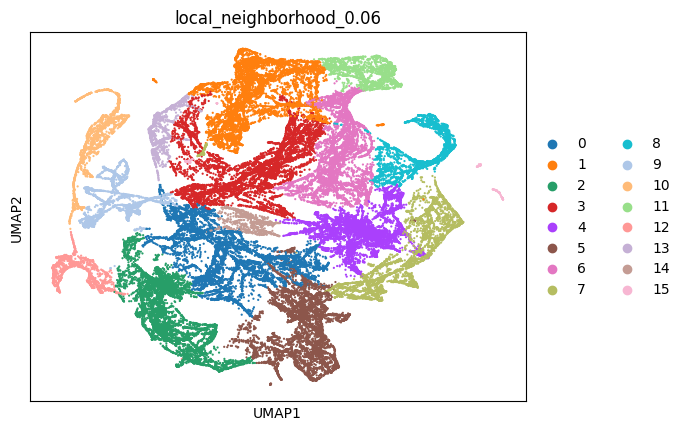

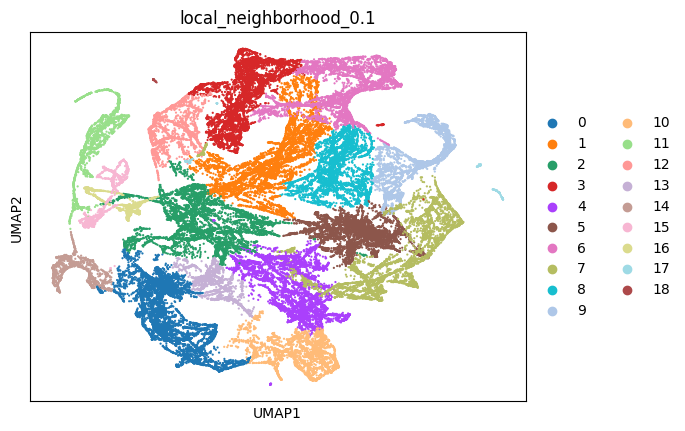

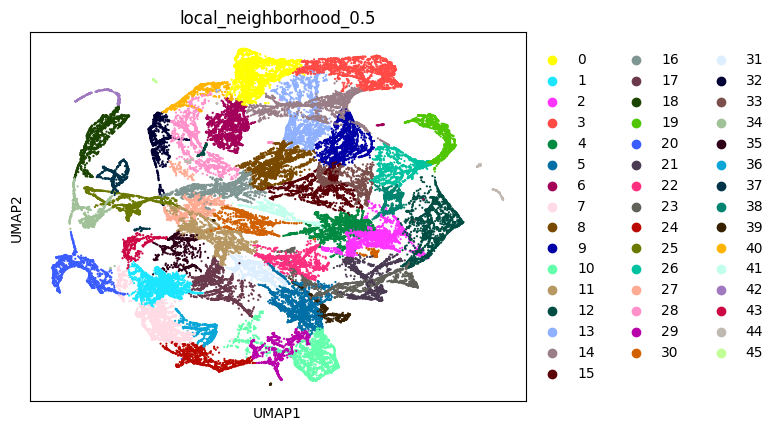

In [45]:
for i in [0.01,  0.04, 0.06,0.1,0.5]: 
    key = 'local_neighborhood_'+str(i)
    if key in ad_sn.obs.columns: 
        sc.pl.umap(ad_sn,color=[key],  s = 10)#,save='UMAP_10X_colors.svg')
    else: 
        sc.tl.leiden(ad_sn,resolution=i, key_added = key)
        sc.pl.umap(ad_sn,color=[key],  s = 10)#,save='UMAP_10X_colors.svg')

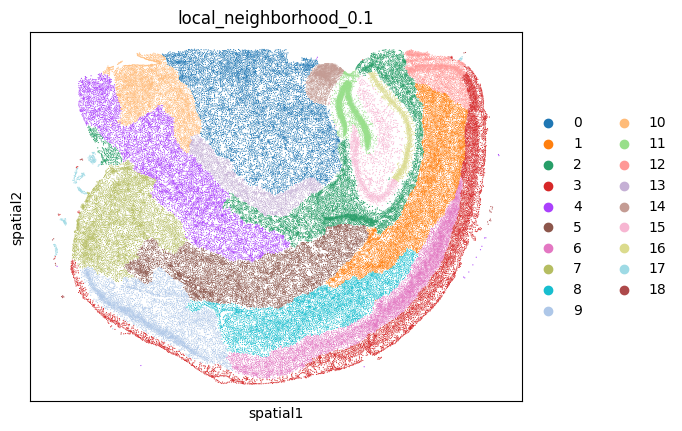

In [74]:
for i in ad_sn.obs['run'].unique():
    ad_sub_sample = ad_sn[ad_sn.obs['run'] == i]
    sc.pl.spatial(ad_sub_sample, color = 'local_neighborhood_0.1', spot_size = 15)

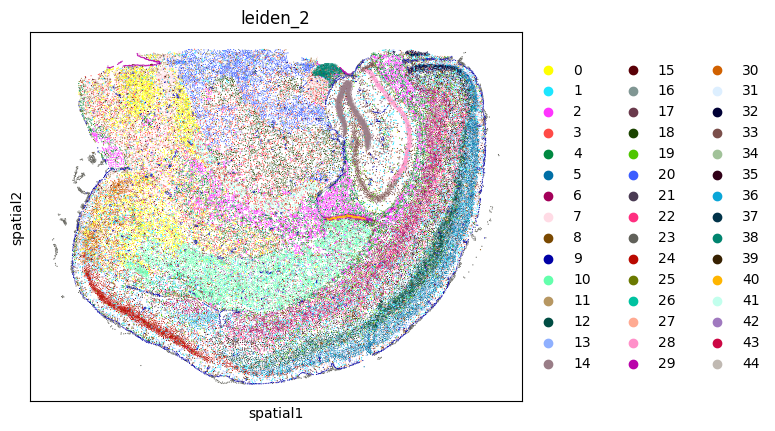

In [75]:
for i in ad_sub.obs['run'].unique():
    ad_sub_sample = ad_sub[ad_sub.obs['run'] == i]
    sc.pl.spatial(ad_sub_sample, color = 'leiden_2', spot_size = 15)

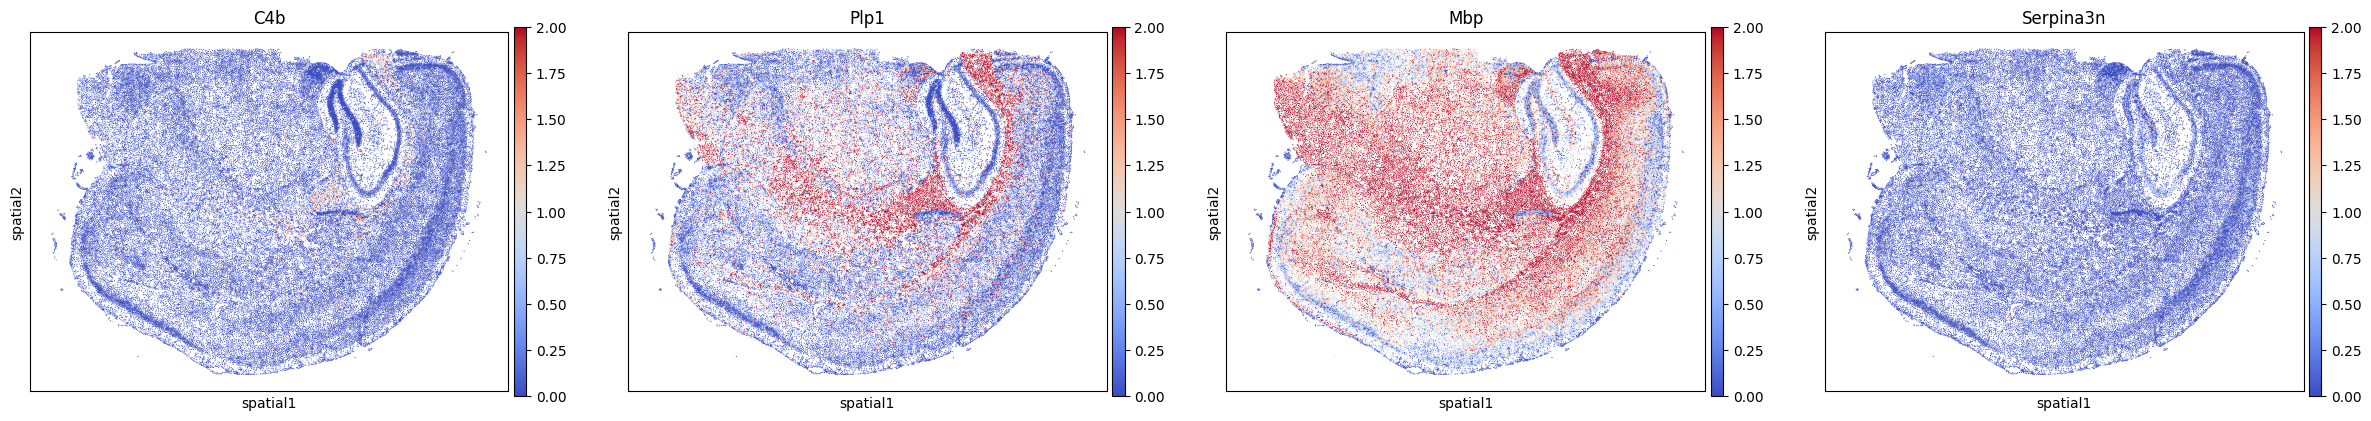

In [78]:
for i in ad_sub.obs['run'].unique():
    ad_sub_sample = ad_sub[ad_sub.obs['run'] == i]
    sc.pl.spatial(
        ad_sub_sample, 
        color = ['C4b','Plp1', 'Mbp', 'Serpina3n'], 
        spot_size = 15, 
        cmap = 'coolwarm', vmax=2
    )

In [48]:
ad_sub.obs['compartment'] = ad_sn.obs['local_neighborhood_0.1']

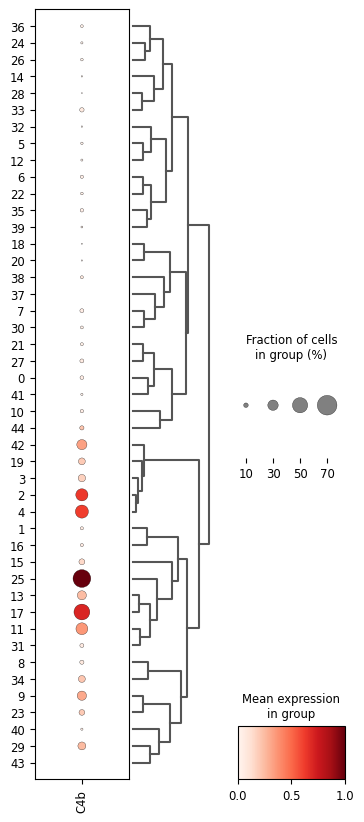

In [70]:
 sc.pl.dotplot(
        ad_sub,
        var_names='C4b',
        groupby="leiden_2",
        standard_scale="var",
        #dot_max=0.5,
        #dot_min=0.05,
        color_map="Reds",
        dendrogram=True,
        figsize=(4, 10)
    )

compartment
2     0.401577
4     0.177998
18    0.132719
17    0.121868
15    0.116372
1     0.097133
5     0.080484
13    0.076985
3     0.076502
10    0.074656
8     0.069239
9     0.061803
7     0.059573
14    0.053755
12    0.051630
16    0.050437
11    0.045968
0     0.026747
6     0.022909
Name: C4b_expr, dtype: float32


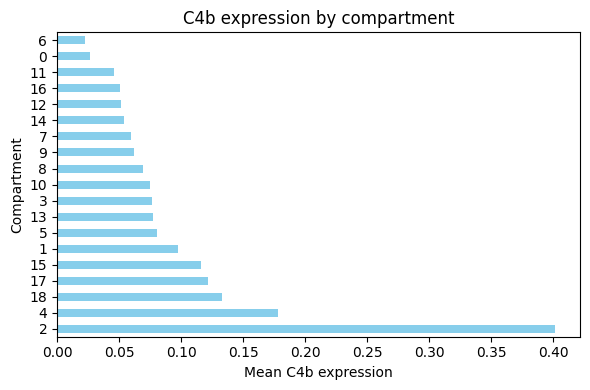

In [50]:
import pandas as pd

# make sure C4b is in var_names
if "C4b" not in ad_sub.var_names:
    raise ValueError("C4b not found in ad_sub.var_names")

# get C4b expression vector
c4b_idx = ad_sub.var_names.get_loc("C4b")
c4b_expr = (
    ad_sub.X[:, c4b_idx].toarray().ravel()
    if hasattr(ad_sub.X, "toarray")
    else ad_sub.X[:, c4b_idx].ravel()
)

# add as column for convenience
ad_sub.obs["C4b_expr"] = c4b_expr

# aggregate by compartment
compartment_means = (
    ad_sub.obs.groupby("compartment")["C4b_expr"]
    .mean()
    .sort_values(ascending=False)
)

print(compartment_means)

# optional: plot
import matplotlib.pyplot as plt
compartment_means.plot(kind="barh", figsize=(6,4), color="skyblue")
plt.xlabel("Mean C4b expression")
plt.ylabel("Compartment")
plt.title("C4b expression by compartment")
plt.tight_layout()
plt.show()

In [54]:
import numpy as np, pandas as pd

gene = "C4b"
x = ad_sub[:, gene].X
x = x.toarray().ravel() if hasattr(x, "toarray") else np.asarray(x).ravel()
ad_sub.obs["_C4b"] = x

thr = np.quantile(x[x>0], 0.75) if (x>0).any() else 0  # "high" expressors

summary = (ad_sub.obs
  .assign(pos = ad_sub.obs["_C4b"]>0,
          high = ad_sub.obs["_C4b"]>=thr)
  .groupby("compartment")
  .agg(mean_C4b=("_C4b","mean"),
       median_C4b=("_C4b","median"),
       frac_pos=("pos","mean"),
       frac_high=("high","mean"),
       n=("pos","size"))
  .sort_values("mean_C4b", ascending=False))
print(summary.head(10))

             mean_C4b  median_C4b  frac_pos  frac_high     n
compartment                                                 
2            0.401577         0.0  0.396311   0.210485  5150
4            0.177998         0.0  0.280212   0.049521  4907
18           0.132719         0.0  0.172414   0.068966    29
17           0.121868         0.0  0.143541   0.057416   209
15           0.116372         0.0  0.191342   0.032035  1155
1            0.097133         0.0  0.130426   0.036822  5160
5            0.080484         0.0  0.130650   0.024768  4845
13           0.076985         0.0  0.122137   0.022901  1441
3            0.076502         0.0  0.131984   0.016547  5137
10           0.074656         0.0  0.142088   0.011482  2787


In [60]:
import numpy as np
import pandas as pd
import squidpy as sq

# 1) Find the exact name used in your matrix
targets = [g for g in ad_sub.var_names if g.lower() in ("c4b", "c4-b", "c4b_")]
if not targets and "gene_symbols" in ad_sub.var.columns:
    # some assays store symbols in var columns
    hits = ad_sub.var.index[ad_sub.var["gene_symbols"].str.lower().eq("c4b")]
    targets = list(hits)

if not targets and ad_sub.raw is not None:
    targets = [g for g in ad_sub.raw.var_names if g.lower() == "c4b"]

if not targets:
    raise ValueError("Couldn't find C4b in ad_sub.var_names (or raw). "
                     "Search var columns to locate the exact symbol used.")

gene = targets[0]
print("Using gene name:", gene)

# 2) Build spatial graph (if not already) and compute Moran’s I
if "spatial" not in ad_sub.obsm:
    raise ValueError("No ad_sub.obsm['spatial'] found. Provide spatial coords.")

sq.gr.spatial_neighbors(ad_sub, coord_type="generic")  # or 'grid' / 'visium' depending on data
sq.gr.spatial_autocorr(ad_sub, mode="moran", genes=[gene])

# 3) Read the result in a version-safe way
moran_res = ad_sub.uns["moranI"]
if isinstance(moran_res, pd.DataFrame):
    # Newer Squidpy: index is gene names
    row = moran_res.loc[gene]
    I = row.get("I", np.nan)
    p = row.get("pval_norm", row.get("pval_sim", np.nan))
else:
    # Older format: dict-like with 'names' column
    df = pd.DataFrame(moran_res)
    row = df.loc[df["names"] == gene].iloc[0]
    I = row.get("I", np.nan)
    p = row.get("pval_norm", row.get("pval_sim", np.nan))

print(f"Moran’s I for {gene}: {I:.4f}, p≈{p:.3g}")

Using gene name: C4b
Moran’s I for C4b: 0.2406, p≈0


In [62]:
import scanpy as sc
comp_genes = [g for g in ["C4b"] if g in ad_sub.var_names]
sc.tl.score_genes(ad_sub, comp_genes, score_name="complement_score", use_raw=False)
ad_sub.obs.groupby("compartment")["complement_score"].mean().sort_values(ascending=False).head(10)

compartment
2     0.313093
18    0.087399
4     0.086463
17    0.055677
15    0.003216
13   -0.001548
10   -0.012474
1    -0.018004
16   -0.021022
5    -0.024148
Name: complement_score, dtype: float64